In [163]:
# Importação das bibliotecas necessárias para analisar/transformar os dados

import warnings
import numpy as np
import seaborn as sns
from methods_preparation import MethodsPreparation


sns.set_style('ticks')
sns.set_context('talk')

warnings.filterwarnings('ignore',category=Warning)


methods = MethodsPreparation()


In [164]:
data = methods.import_df('country_data')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## **Temos um total de 167 países.**

In [166]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [167]:
# Verificando dados duplicados
data.duplicated().any(), data.duplicated().sum()

(False, 0)

## Faixa dinâmica das variáveis 

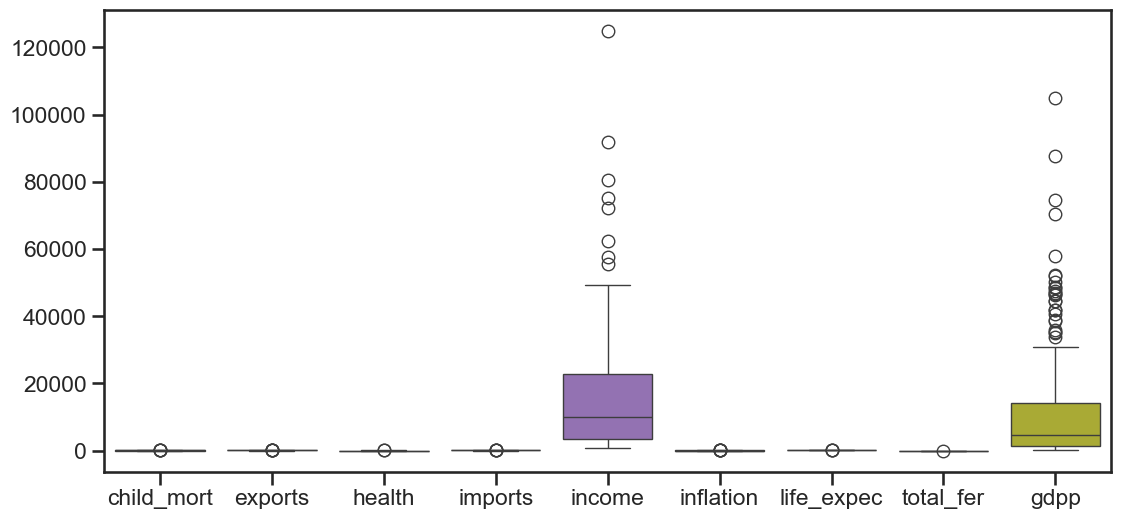

In [168]:
methods.dynamic_range(data)

In [169]:
# Estatística descritiva 

data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [170]:
# Análise da taxa de importação e exportação (da menor para a maior)

data.sort_values(by=['imports','exports'], ascending=True).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988
22,Brazil,19.8,10.700,9.01,11.8000,14500,8.41,74.2,1.80,11200
77,Japan,3.2,15.000,9.49,13.6000,35800,-1.90,82.8,1.39,44500
159,United States,7.3,12.400,17.90,15.8000,49400,1.22,78.7,1.93,48400
5,Argentina,14.5,18.900,8.10,16.0000,18700,20.90,75.8,2.37,10300


## Tratamento dos dados

Como foi visto na tabela acima, Myanmar possui valores de imports e exports que não estão de acordo com os dados reais de importação e exportação segundo o World Bank (https://data.worldbank.org/indicator/NE.IMP.GNFS.ZS?locations=MM ; https://data.worldbank.org/indicator/NE.EXP.GNFS.ZS?locations=MM). Além disso não há no dataset nenhuma informação de quando estes dados foram coletados, sendo assim se torna extremamente complicado imputar valores que não condizem com a realidade, portanto infelizmente Myanmar será excluído.

In [171]:
df = data.copy()

In [172]:
# Excluindo Myanmar

df_without_Myanmar = df.drop(df.loc[df['country'] == 'Myanmar'].index)
df_without_Myanmar

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


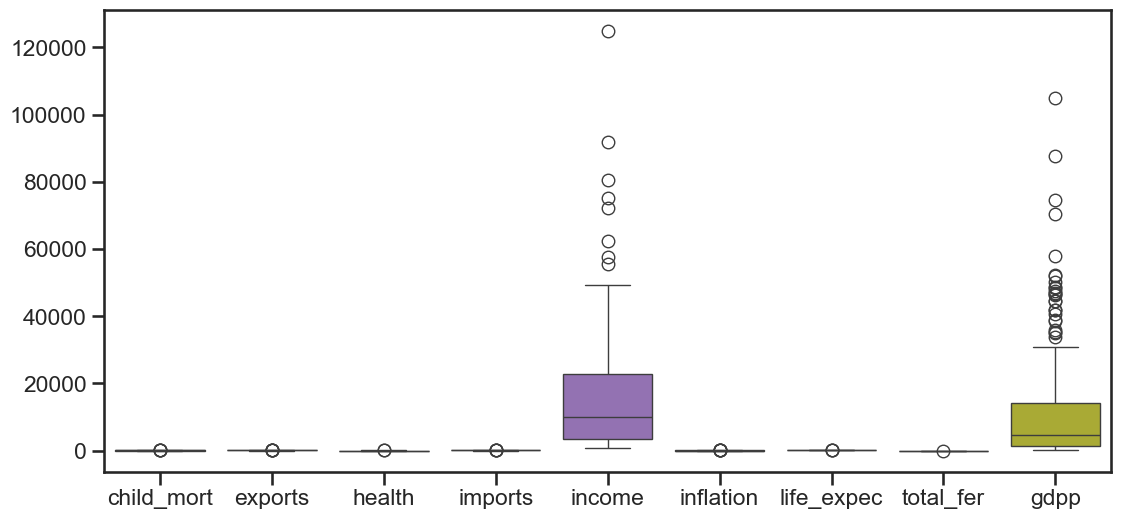

In [173]:
methods.dynamic_range(df)

Como visto na faixa dinâmica os dados de "gdpp" e "income" estão muito discrepantes em relação aos outros, como o KMeans é sensível a distância, aplicaremos o logaritmo para escalonar as variáveis.

In [174]:
# df_without_Myanmar['gdpp'] = np.log(df_without_Myanmar['gdpp'])
# df_without_Myanmar['income'] = np.log(df_without_Myanmar['income'])
# df_without_Myanmar['imports'] = np.log(df_without_Myanmar['imports'])
# df_without_Myanmar['exports'] = np.log(df_without_Myanmar['exports'])

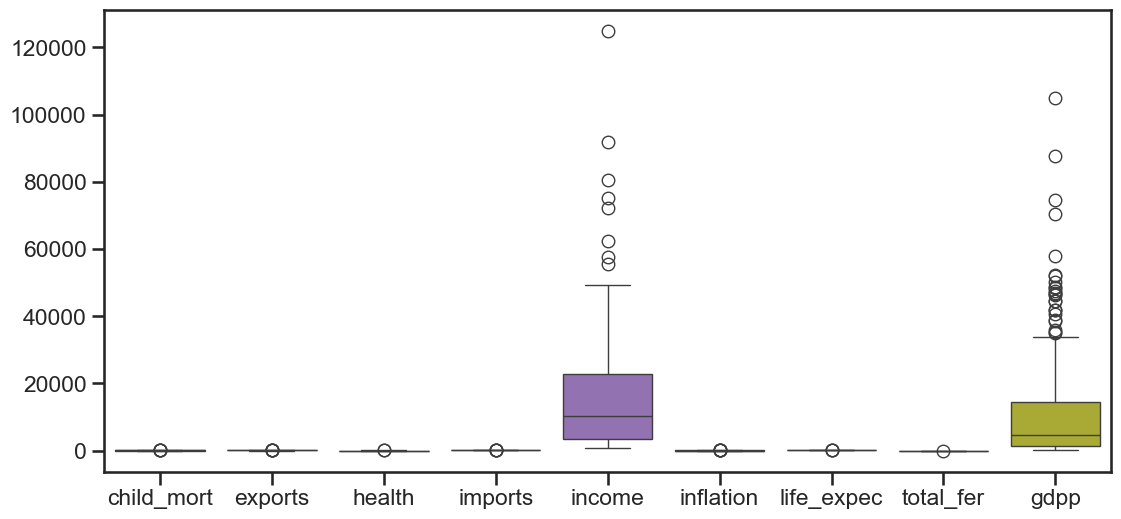

In [175]:
# Faixa dinâmica após a aplicação do logaritmo.

methods.dynamic_range(df_without_Myanmar)

In [176]:
# Método de pré-processamento

df_scaled = methods.preprocessing(df_without_Myanmar.drop(columns='country'))

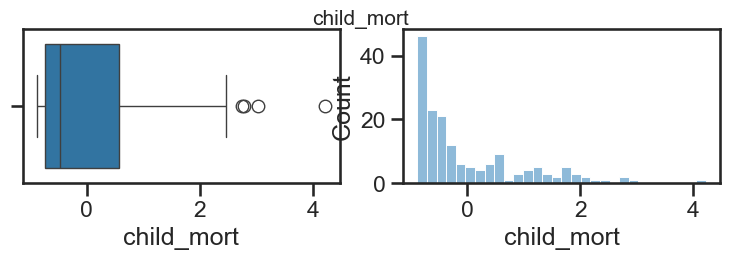

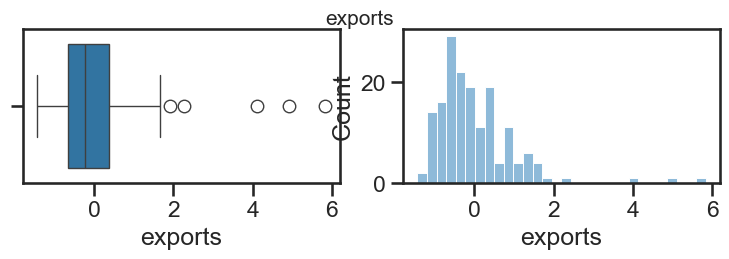

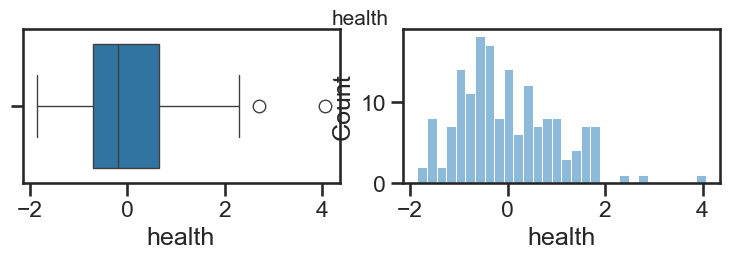

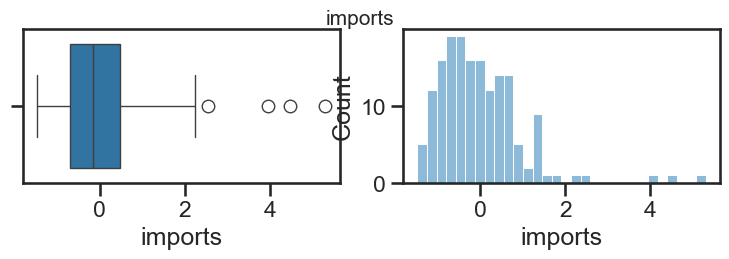

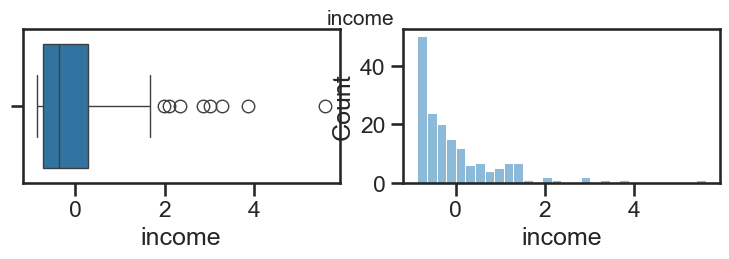

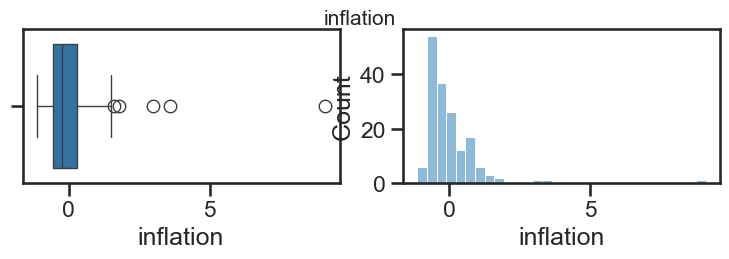

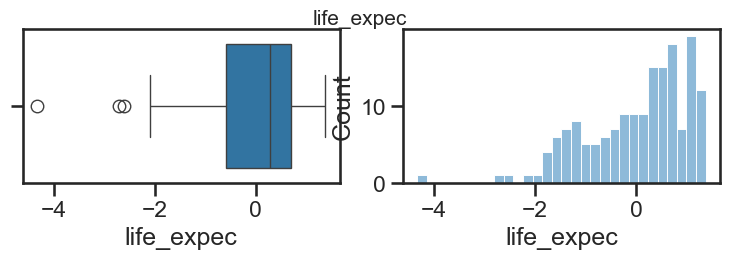

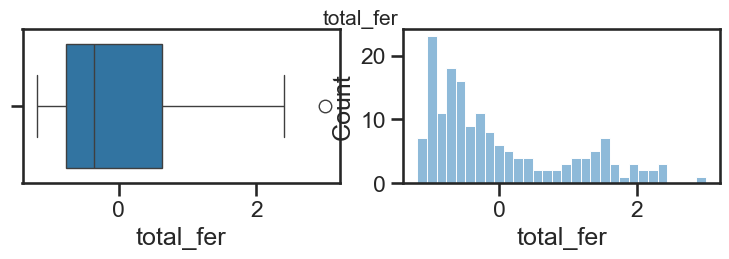

In [177]:
# Distribuições e análise do mínimo; do primeiro quartil; da mediana; do terceiro quartil e do máximo.

methods.boxplot_distribution(df_scaled)

Ainda podemos notar a presença de outliers, mas seguiremos desta forma já que excluir dados sem justificativas plausíveis não é uma boa prática.

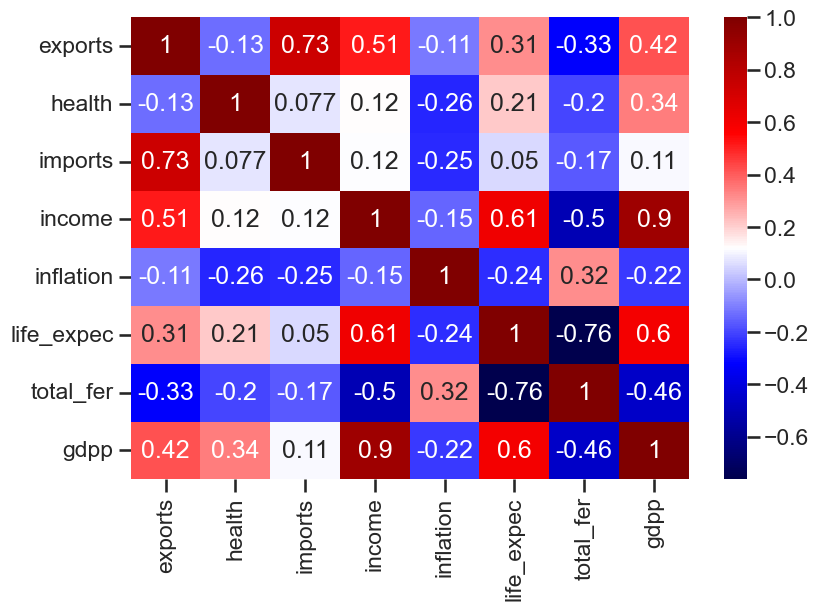

In [178]:
# Análise das correlações 

methods.correlation(df_scaled)

In [179]:
df_scaled['country'] = df_without_Myanmar['country']

In [180]:
methods.export_df(df_scaled,'df_scaled')

'Arquivo salvo com sucesso.'